In [30]:
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score  
from sklearn.metrics import confusion_matrix 
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [31]:
data_df=pd.read_csv("creditcard.csv")

In [32]:
data_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [33]:
data_df.shape

(284807, 31)

In [34]:
data_df[['Amount','Time','Class']].describe()

,Amount,Time,Class
count,284807.000000,284807.000000,284807.000000
mean,88.349619,94813.859575,0.001727
std,250.120109,47488.145955,0.041527
min,0.000000,0.000000,0.000000
25%,5.600000,54201.500000,0.000000
50%,22.000000,84692.000000,0.000000
75%,77.165000,139320.500000,0.000000
max,25691.160000,172792.000000,1.000000


In [35]:
data_df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [36]:
data_df.isna().any()

Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool

In [37]:
null_columns=pd.DataFrame({'Columns':data_df.isna().sum().index,'No. Null values':data_df.isna().sum().values,'Percentage':data_df.isna().sum().values/data_df.shape[0]})

In [38]:
null_columns

,Columns,No. Null values,Percentage
0,Time,0,0.0
1,V1,0,0.0
2,V2,0,0.0
3,V3,0,0.0
4,V4,0,0.0
5,V5,0,0.0
6,V6,0,0.0
7,V7,0,0.0
8,V8,0,0.0
9,V9,0,0.0


In [39]:
data_df['Class'].tail(10)

284797    0
284798    0
284799    0
284800    0
284801    0
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, dtype: int64

### <b> Percentage of total not fraud transaction

In [40]:
nfcount=0
notFraud=data_df['Class']
for i in range(len(notFraud)):
    if notFraud[i]==0:
        nfcount=nfcount+1

nfcount    
per_nf=(nfcount/len(notFraud))*100
print('percentage of total not fraud transaction in the dataset: ',per_nf)

percentage of total not fraud transaction in the dataset:  99.82725143693798


### <b> Percentage of total  fraud transaction

In [41]:
fcount=0
Fraud=data_df['Class']
for i in range(len(Fraud)):
    if Fraud[i]==1:
        fcount=fcount+1

fcount    
per_f=(fcount/len(Fraud))*100
print('percentage of total fraud transaction in the dataset: ',per_f)


percentage of total fraud transaction in the dataset:  0.1727485630620034


In [42]:
plot_data=pd.DataFrame()
plot_data['Fraud Transaction']=Fraud
plot_data['Genuine Transaction']=notFraud
plot_data

,Fraud Transaction,Genuine Transaction
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
284802,0,0
284803,0,0
284804,0,0
284805,0,0


<AxesSubplot:title={'center':'Bar plot for Fraud VS Genuine transactions'}, xlabel='Fraud Transaction', ylabel='Genuine Transaction'>

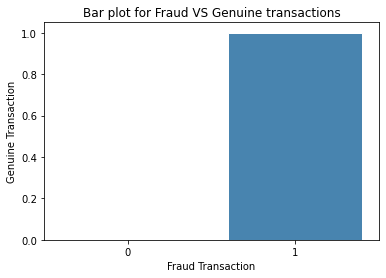

In [43]:
plt.title("Bar plot for Fraud VS Genuine transactions")
sns.barplot(x = 'Fraud Transaction', y = 'Genuine Transaction', data = plot_data, palette = 'Blues', edgecolor = 'w')

Text(0.5, 1.0, 'Time Vs amount')

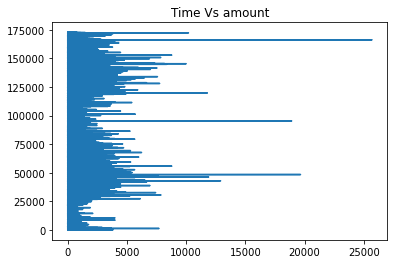

In [44]:
x=data_df['Amount']
y=data_df['Time']
plt.plot(x, y) 
plt.title('Time Vs amount') 
#sns.barplot(x = x, y = y, data = data, palette = 'Blues', edgecolor = 'w')

In this graph we try to plot the relation between Time and the amount.

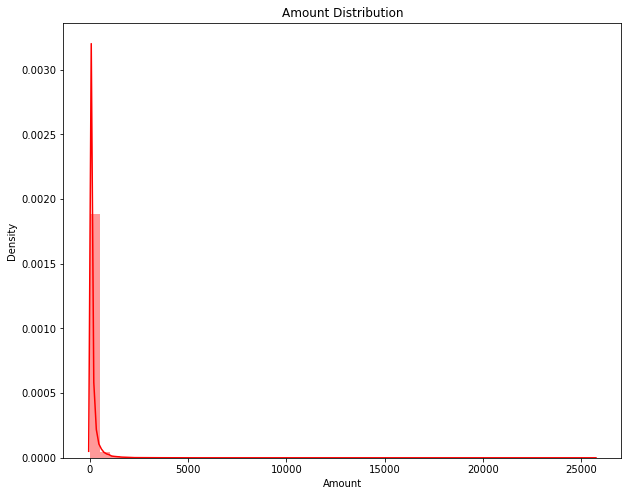

In [45]:
plt.figure(figsize=(10,8), )
plt.title('Amount Distribution')

sns.distplot(data_df['Amount'],color='red');

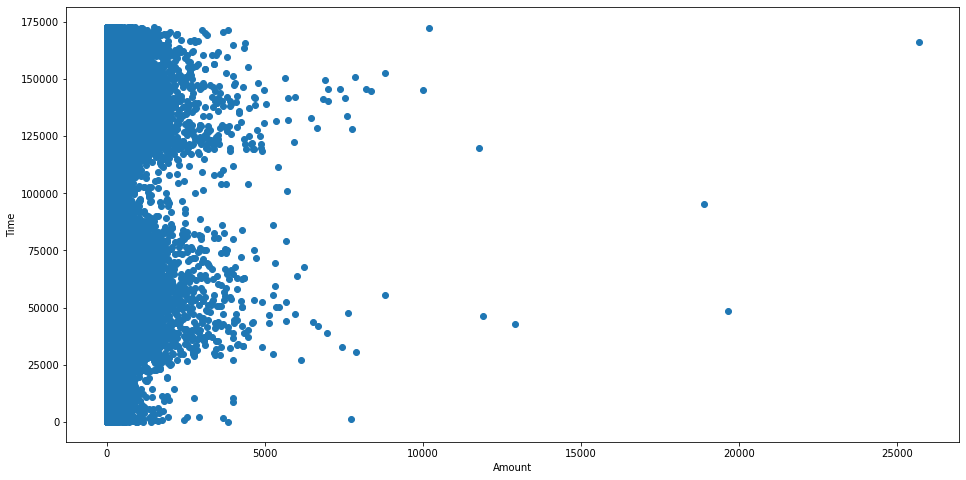

In [46]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(data_df['Amount'], data_df['Time'])
ax.set_xlabel('Amount')
ax.set_ylabel('Time')
plt.show()

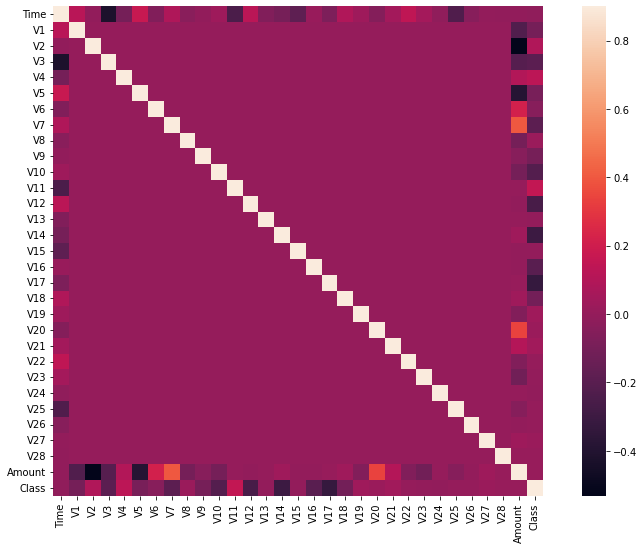

In [47]:
# Correlation matrix 
correlation_metrics = data_df.corr() 
fig = plt.figure(figsize = (14, 9)) 
sns.heatmap(correlation_metrics, vmax = .9, square = True) 
plt.show() 

In [48]:
x=data_df.drop(['Class'], axis = 1)#drop the target variable
y=data_df['Class']
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, random_state = 42) 


In [49]:
logisticreg = LogisticRegression()
logisticreg.fit(xtrain, ytrain)

LogisticRegression()

In [50]:
y_pred = logisticreg.predict(xtest)
accuracy= logisticreg.score(xtest,ytest)

In [51]:
cm = metrics.confusion_matrix(ytest, y_pred)
print(cm)

[[56830    34]
 [   41    57]]


### <b>Accuracy calculation

In [52]:
print('Accuracy score of the Logistic regression model: ', accuracy*100,'%')

Accuracy score of the Logistic regression model:  99.86833327481479 %


In [53]:
from sklearn.metrics import classification_report
print(classification_report(ytest,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.63      0.58      0.60        98

    accuracy                           1.00     56962
   macro avg       0.81      0.79      0.80     56962
weighted avg       1.00      1.00      1.00     56962

